<a href="https://colab.research.google.com/github/FatimaBonilla/An-lisis-de-Datos-para-Ciencias-Ambientales-/blob/main/Vehicle_CO2_Emissions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizar un análisis descriptivo del conjunto de datos CO2


About Dataset
This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles and predict their CO2 emissions using regression models. The dataset is structured to support both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) approaches for machine learning projects.

Key Features
**Brand**: The brand or manufacturer of the vehicle(e.g., Toyota, Ford, BMW).

**Vehicle Type**: Classification of vehicles based on size and usage (e.g., SUV, Sedan).

**Engine Size (L)**: Engine displacement volume in liters.
Cylinders: Number of cylinders in the engine.

**Transmission**: Type of transmission (e.g., Automatic, Manual).
**Fuel Type**: Type of fuel used by the vehicle (e.g., Gasoline, Diesel, Hybrid).

**Fuel Consumption** (City, Hwy, and Combined): ** Fuel efficiency measured in liters per 100 kilometers (L/100 km)**

**CO2 Emissions (g/km)**: Carbon dioxide emissions per kilometer (target variable for prediction).


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd    #Librería para manejo de datos
import seaborn as sns  #Librería para hacer gráficos
datos=pd.read_csv("/content/drive/MyDrive/Análisis de datos en Ciencias Ambientales/co2.csv") #se copia la ruta de acceso
pd.set_option("display.max_rows", None)
datos.head() #muestra las primeras 5 filas con este comando

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
#Las variables cualitativas son escala nominal (si existe una jerarquía) y ordinaria (no existe una jerarquía)
#objeto = cualitativa
#cualitativa ordinal en escala de liker se recomienda análisis de frecuencia
#análisis descriptivo de frecuencias
#Variabes con valores discretos= Cuantitativo
#Escala de razon cualquier valor numérico


In [17]:
datos.info()
#para saber información del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [39]:
#Obtener un resumen de 7 puntos
datos. describe().T
#La T es para voltear la tabla

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [43]:
datos.groupby(["Make"]).describe().T
#Sirve para agrupar los datos dependiendo de la marca

Make                                         ACURA  ALFA ROMEO  ASTON MARTIN  \
Engine Size(L)                   count   72.000000   30.000000     47.000000   
                                 mean     3.037500    2.143333      5.189362   
                                 std      0.625162    0.433656      0.722987   
                                 min      1.500000    1.800000      4.000000   
                                 25%      2.400000    1.800000      4.700000   
                                 50%      3.500000    2.000000      5.200000   
                                 75%      3.500000    2.000000      6.000000   
                                 max      3.700000    2.900000      6.000000   
Cylinders                        count   72.000000   30.000000     47.000000   
                                 mean     5.305556    4.466667     10.127660   
                                 std      0.958856    0.860366      2.017500   
                                 min      4.000000    4.000000      8.000000   
                                 25%      4.000000    4.000000      8.000000   
                                 50%      6.000000    4.000000     12.000000   
                                 75%      6.000000    4.000000     12.000000   
                                 max      6.000000    6.000000     12.000000   
Fuel Consumption City (L/100 km) count   72.000000   30.000000     47.000000   
                                 mean    10.797222   10.966667     17.091489   
                                 std      1.594707    1.664711      1.897347   
                                 min      6.000000    9.700000     12.700000   
                                 25%      9.675000    9.700000     16.700000   
                                 50%     11.200000   10.300000     17.400000   
                                 75%     12.100000   10.800000     18.050000   
                                 max     13.400000   14.100000     23.200000   
Fuel Consumption Hwy (L/100 km)  count   72.000000   30.000000     47.000000   
                                 mean     8.134722    7.963333     11.508511   
                                 std      1.074960    1.195533      1.002352   
                                 min      5.800000    6.900000      9.400000   
                                 25%      7.400000    6.900000     10.900000   
                                 50%      8.200000    7.700000     11.400000   
                                 75%      9.000000    8.300000     12.300000   
                                 max     10.800000   10.400000     14.400000   
Fuel Consumption Comb (L/100 km) count   72.000000   30.000000     47.000000   
                                 mean     9.602778    9.580000     14.582979   
                                 std      1.210747    1.453747      1.477707   
                                 min      5.900000    8.400000     11.200000   
                                 25%      8.675000    8.400000     14.100000   
                                 50%      9.800000    9.200000     14.700000   
                                 75%     10.700000    9.600000     15.500000   
                                 max     11.600000   12.400000     19.200000   
Fuel Consumption Comb (mpg)      count   72.000000   30.000000     47.000000   
                                 mean    29.875000   30.133333     19.489362   
                                 std      4.437159    4.040599      2.254197   
                                 min     24.000000   23.000000     15.000000   
                                 25%     26.000000   29.000000     18.000000   
                                 50%     29.000000   31.000000     19.000000   
                                 75%     32.250000   34.000000     20.000000   
                                 max     48.000000   34.000000     25.000000   
CO2 Emissions(g/km)              count   72.000000   30.000000     47.000000   


In [ ]:
#para seleccionar y hacer una columna unteractiva es

In [18]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].mean()

,0
Fuel Consumption City (L/100 km),12.556534
Fuel Consumption Hwy (L/100 km),9.041706
Fuel Consumption Comb (L/100 km),10.975071
Fuel Consumption Comb (mpg),27.481652
CO2 Emissions(g/km),250.584699


In [19]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].median() #Obtenemos la mediana

,0
Fuel Consumption City (L/100 km),12.1
Fuel Consumption Hwy (L/100 km),8.7
Fuel Consumption Comb (L/100 km),10.6
Fuel Consumption Comb (mpg),27.0
CO2 Emissions(g/km),246.0


In [20]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].mode() #Obtenemos la moda

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,10.8,7.8,9.4,25,242


In [21]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].quantile(0.25) #Obtenemos el cuartil 1

,0.25
Fuel Consumption City (L/100 km),10.1
Fuel Consumption Hwy (L/100 km),7.5
Fuel Consumption Comb (L/100 km),8.9
Fuel Consumption Comb (mpg),22.0
CO2 Emissions(g/km),208.0


In [22]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].quantile(0.5) #Obtenemos el cuartil 2

,0.5
Fuel Consumption City (L/100 km),12.1
Fuel Consumption Hwy (L/100 km),8.7
Fuel Consumption Comb (L/100 km),10.6
Fuel Consumption Comb (mpg),27.0
CO2 Emissions(g/km),246.0


In [23]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].quantile(0.75) #Obtenemos el cuartil 3

,0.75
Fuel Consumption City (L/100 km),14.6
Fuel Consumption Hwy (L/100 km),10.2
Fuel Consumption Comb (L/100 km),12.6
Fuel Consumption Comb (mpg),32.0
CO2 Emissions(g/km),288.0


In [24]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].var() #Obtenemos la varianza

,0
Fuel Consumption City (L/100 km),12.251919
Fuel Consumption Hwy (L/100 km),4.948206
Fuel Consumption Comb (L/100 km),8.366593
Fuel Consumption Comb (mpg),52.300076
CO2 Emissions(g/km),3423.733650


In [25]:
#["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]

In [26]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].std() #Obtenemos la desviación estándar

,0
Fuel Consumption City (L/100 km),3.500274
Fuel Consumption Hwy (L/100 km),2.224456
Fuel Consumption Comb (L/100 km),2.892506
Fuel Consumption Comb (mpg),7.231879
CO2 Emissions(g/km),58.512679


In [27]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].min() #Obtenemos el mínimo

,0
Fuel Consumption City (L/100 km),4.2
Fuel Consumption Hwy (L/100 km),4.0
Fuel Consumption Comb (L/100 km),4.1
Fuel Consumption Comb (mpg),11.0
CO2 Emissions(g/km),96.0


In [28]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].max() #Obtenemos el máximo

,0
Fuel Consumption City (L/100 km),30.6
Fuel Consumption Hwy (L/100 km),20.6
Fuel Consumption Comb (L/100 km),26.1
Fuel Consumption Comb (mpg),69.0
CO2 Emissions(g/km),522.0


In [29]:
datos[["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]].describe()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,12.556534,9.041706,10.975071,27.481652,250.584699
std,3.500274,2.224456,2.892506,7.231879,58.512679
min,4.200000,4.000000,4.100000,11.000000,96.000000
25%,10.100000,7.500000,8.900000,22.000000,208.000000
50%,12.100000,8.700000,10.600000,27.000000,246.000000
75%,14.600000,10.200000,12.600000,32.000000,288.000000
max,30.600000,20.600000,26.100000,69.000000,522.000000


In [30]:
datos.groupby(["Vehicle Class"]).describe().T

Vehicle Class                               COMPACT   FULL-SIZE     MID-SIZE  \
Engine Size(L)                   count  1022.000000  639.000000  1133.000000   
                                 mean      2.472994    3.700469     2.888967   
                                 std       1.127388    1.388945     1.280394   
                                 min       1.000000    1.500000     1.400000   
                                 25%       1.800000    3.000000     2.000000   
                                 50%       2.000000    3.600000     2.500000   
                                 75%       3.000000    4.400000     3.500000   
                                 max       6.700000    6.700000     6.800000   
Cylinders                        count  1022.000000  639.000000  1133.000000   
                                 mean      4.887476    6.553991     5.200353   
                                 std       1.687094    2.112764     1.638085   
                                 min       3.000000    4.000000     3.000000   
                                 25%       4.000000    6.000000     4.000000   
                                 50%       4.000000    6.000000     4.000000   
                                 75%       6.000000    8.000000     6.000000   
                                 max      12.000000   12.000000    12.000000   
Fuel Consumption City (L/100 km) count  1022.000000  639.000000  1133.000000   
                                 mean     10.708611   13.654617    11.100530   
                                 std       2.760088    3.287872     3.210900   
                                 min       4.400000    4.200000     4.300000   
                                 25%       8.800000   12.000000     8.900000   
                                 50%      10.200000   13.700000    10.500000   
                                 75%      12.000000   15.700000    12.800000   
                                 max      20.900000   20.900000    24.500000   
Fuel Consumption Hwy (L/100 km)  count  1022.000000  639.000000  1133.000000   
                                 mean      7.675147    9.156651     7.789585   
                                 std       1.556978    1.757130     1.691785   
                                 min       4.500000    4.000000     4.600000   
                                 25%       6.600000    8.000000     6.500000   
                                 50%       7.400000    9.100000     7.500000   
                                 75%       8.400000   10.200000     8.700000   
                                 max      13.100000   13.600000    14.900000   
Fuel Consumption Comb (L/100 km) count  1022.000000  639.000000  1133.000000   
                                 mean      9.343933   11.633646     9.609356   
                                 std       2.197469    2.580803     2.505380   
                                 min       4.500000    4.100000     4.400000   
                                 25%       7.800000   10.300000     7.800000   
                                 50%       8.900000   11.700000     9.100000   
                                 75%      10.400000   13.150000    11.000000   
                                 max      17.200000   17.500000    20.000000   
Fuel Consumption Comb (mpg)      count  1022.000000  639.000000  1133.000000   
                                 mean     31.737769   25.809077    31.379523   
                                 std       6.968920    7.719485     8.234784   
                                 min      16.000000   16.000000    14.000000   
                                 25%      27.000000   21.500000    26.000000   
                                 50%      32.000000   24.000000    31.000000   
                                 75%      36.000000   27.000000    36.000000   
                                 max      63.000000   69.000000    64.000000   
CO2 Emissions(g/km)              count  1022.000000  639.000000  1133.000000   


In [31]:
datos.drop(["Vehicle Class"], axis=1).select_dtypes(include=['number']).corr(method="pearson")

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


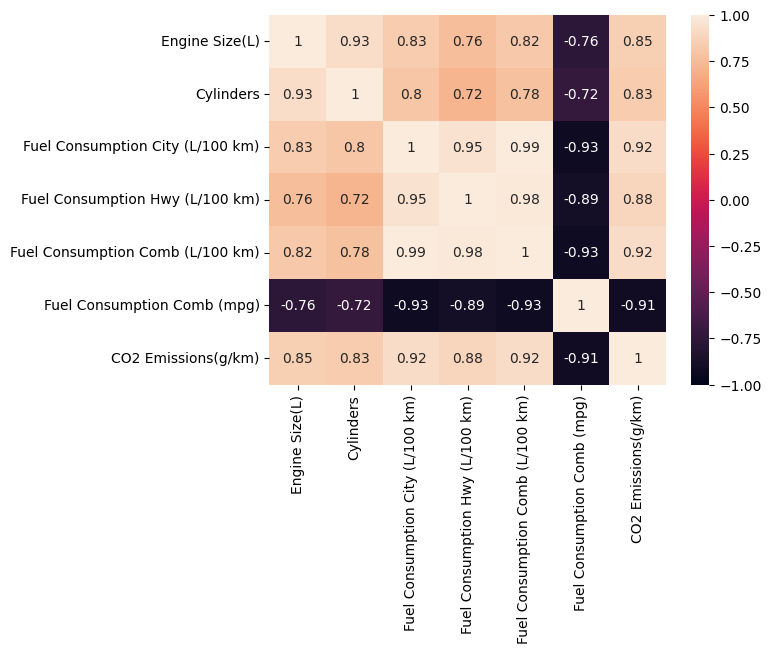

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(datos.drop(["Vehicle Class"], axis=1).select_dtypes(include=['number']).corr(method="pearson"), vmin=-1, vmax=1, annot=True, cmap="rocket")
plt.savefig("Correlación.jpg",dpi=300)

In [54]:
datos["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [56]:
len(datos["Model"].unique())

2053

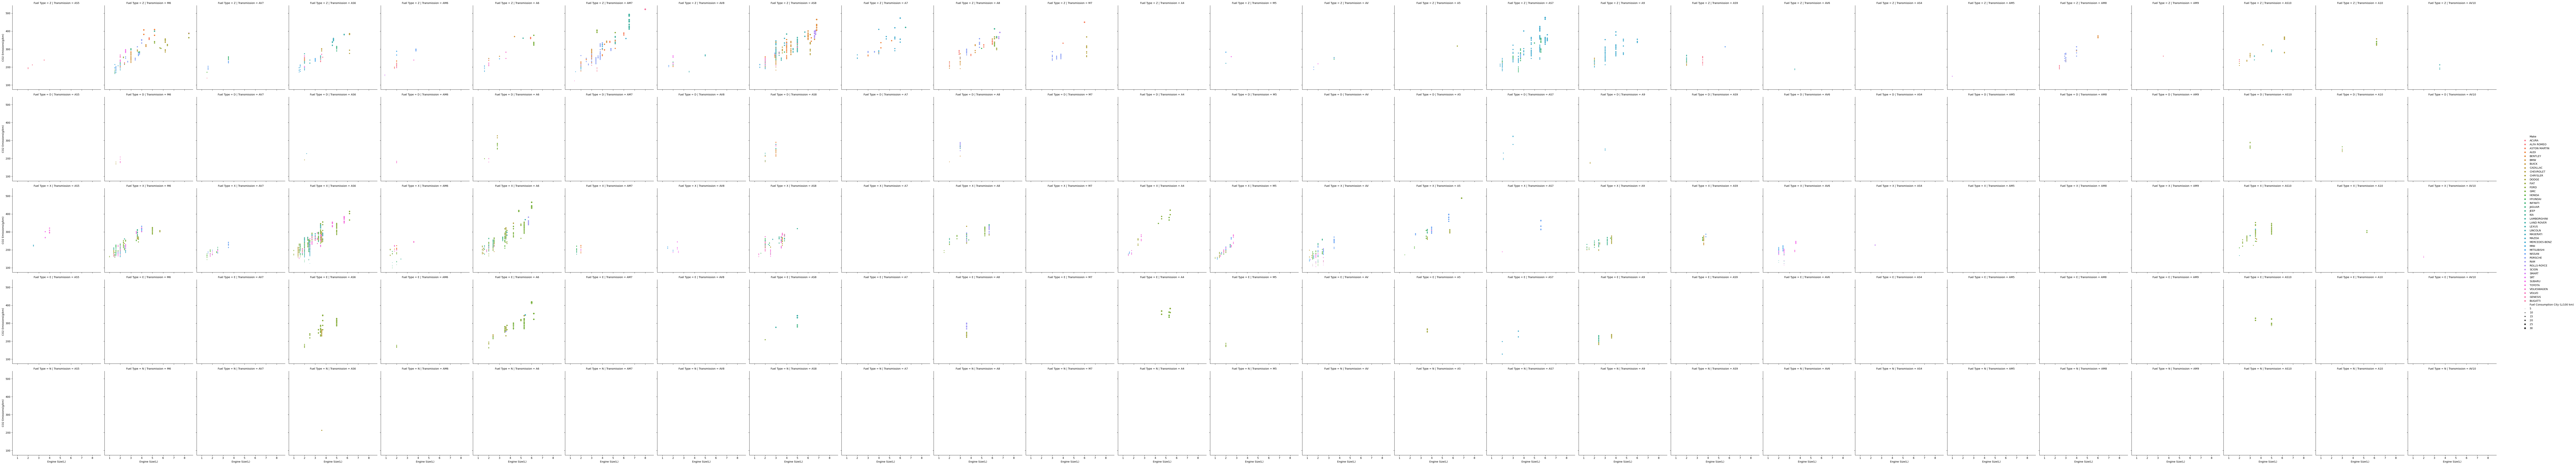

In [65]:
sns.relplot(x="Engine Size(L)", y="CO2 Emissions(g/km)",
            hue="Make", size="Fuel Consumption City (L/100 km)",
            sizes=(1,50), row="Fuel Type", col= "Transmission", data=datos)
#para parametrizar filas y columnas se recomienda tener valores cualitativos ya que si no se hace mucha informacionón

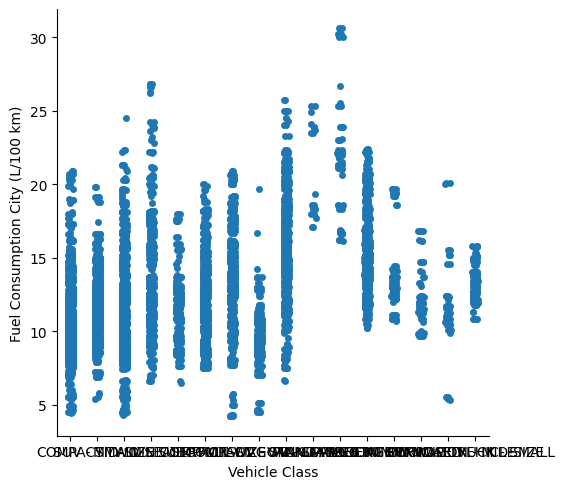

In [33]:
#Obtener un gráfico de puntos
sns.catplot(x="Vehicle Class", y="Fuel Consumption City (L/100 km)", data=datos, kind="strip")
#El diagrama de puntos da un acumulado

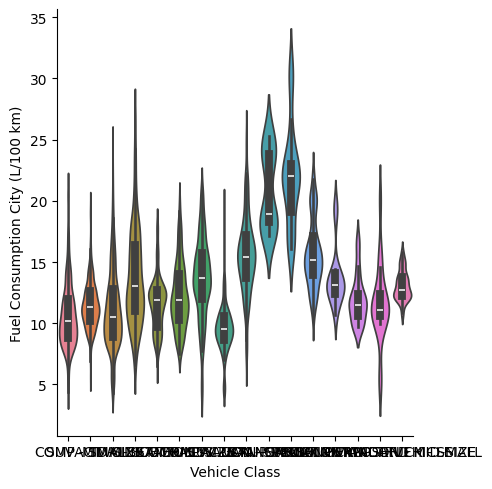

In [52]:
#Diagrama de Violín
sns.catplot(x="Vehicle Class", y="Fuel Consumption City (L/100 km)", hue="Vehicle Class", data=datos, kind="violin")
#el alargamiento de los rombos simboliza los datos anormales o atípicos

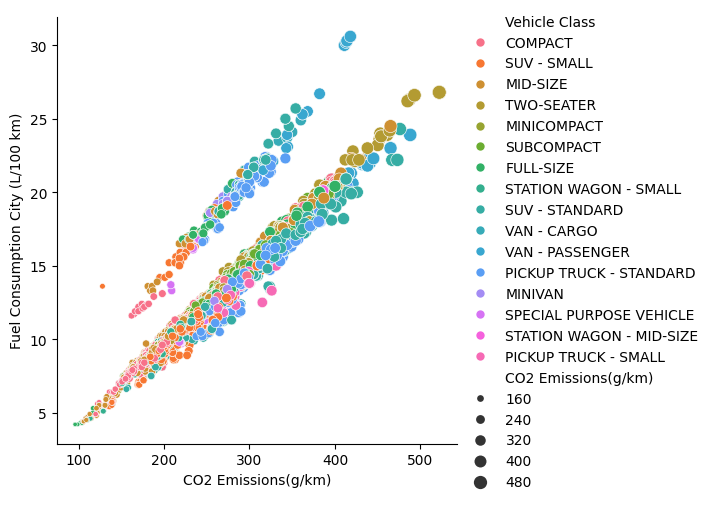

In [36]:
#Construimos un diagrama de dispersión
sns.relplot(x="CO2 Emissions(g/km)", y="Fuel Consumption City (L/100 km)", hue="Vehicle Class", size="CO2 Emissions(g/km)", sizes=(10,100), data=datos)

In [37]:
datos.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


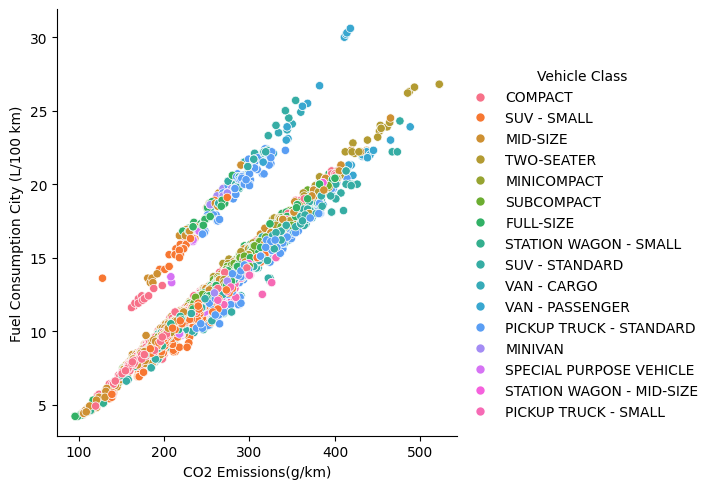

In [38]:
sns.relplot(x="CO2 Emissions(g/km)", y="Fuel Consumption City (L/100 km)", hue="Vehicle Class", data=datos)

In [67]:
datos_acura=datos[datos["Make"]=="ACURA"]
datos_acura.head()
#Filtro para preguntar solo por ciertos datos en este caso acura

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


person es r minuscula que tan relacionadas estan las dos variables
ayuda a saber que variable predictoria ayuda a predecir por su grado de correlación.

Colinealidad: cuando se trata de construir un modelo lineal puede que **entre las variables predictorias exista correlación**, puede restar significancia , por lo que es deseable que no exista colinealidad. ☝
*A partir de .85 ya se toma en cuenta una buena corelación*

<Axes: >

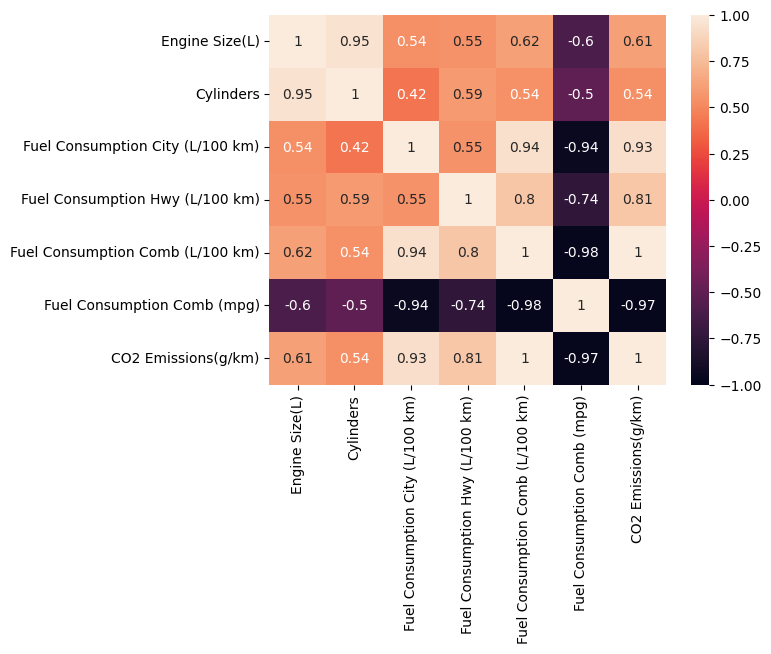

In [71]:
sns.heatmap(datos_acura.drop(["Make", "Model", "Vehicle Class", "Fuel Type", "Transmission"], axis=1).corr(method="pearson"), vmin=-1, vmax=1, annot=True)

si se quiere correlacionar una escala cuantitativa con una cualitativa se ocupa spearman
ej. escala de likert con una variable cuantitativa
Poner un análisis exploratorio.

<Axes: >

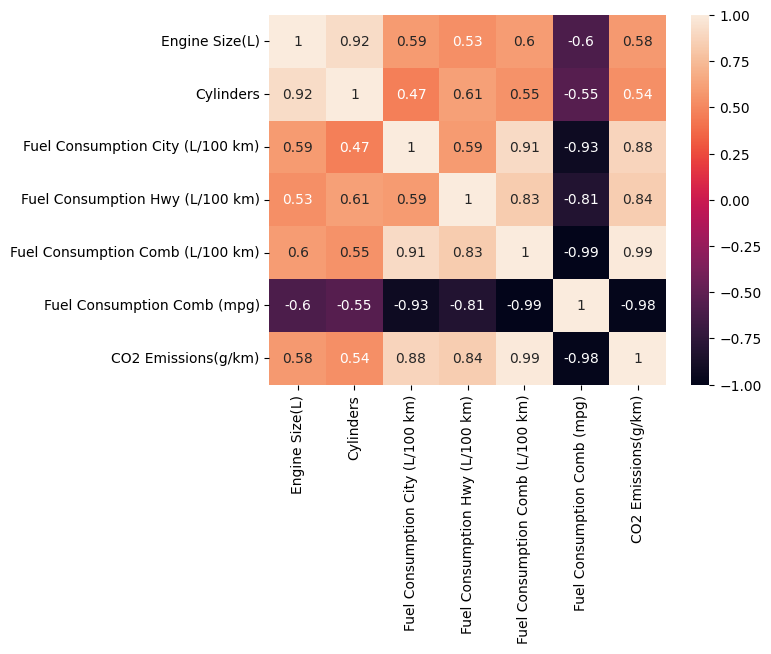

In [72]:
sns.heatmap(datos_acura.drop(["Make", "Model", "Vehicle Class", "Fuel Type", "Transmission"], axis=1).corr(method="spearman"), vmin=-1, vmax=1, annot=True)

In [77]:
datos_MERCEDESBENZ=datos[datos["Make"]=="MERCEDES-BENZ"]
datos_MERCEDESBENZ.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
726,MERCEDES-BENZ,C 250,COMPACT,1.8,4,AS7,Z,10.9,7.5,9.4,30,216
727,MERCEDES-BENZ,C 250 COUPE,SUBCOMPACT,1.8,4,AS7,Z,11.0,7.4,9.4,30,216
728,MERCEDES-BENZ,C 300 4MATIC FFV,COMPACT,3.5,6,AS7,Z,12.2,8.5,10.5,27,242
729,MERCEDES-BENZ,C 300 4MATIC FFV,COMPACT,3.5,6,AS7,E,16.4,11.1,14.0,20,224


<Axes: >

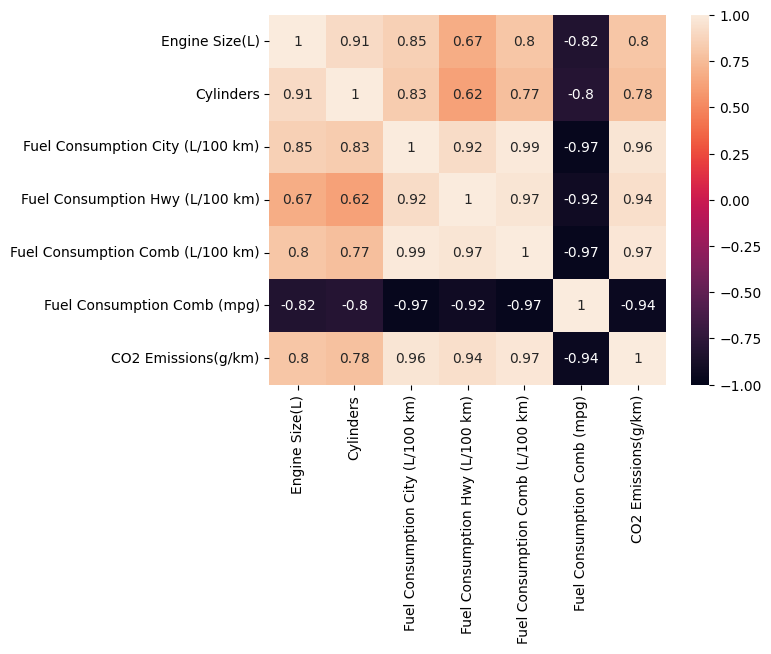

In [80]:
sns.heatmap(datos_MERCEDESBENZ.drop(["Make", "Model", "Vehicle Class", "Fuel Type", "Transmission"], axis=1).corr(method="pearson"), vmin=-1, vmax=1, annot=True)